# Data Visualization for Master Thesis

Introduction

## Import Resources

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon
# import seaborn as sns

path_vis_local = "/Users/greg/Downloads/AR_Master_Thesis/vis/auc/auc_"
path_vis_iCloud = "/Users/greg/Documents/thesis/vis/auc/auc_"
plot_which_score = ""

## Data Visualization

### Vis 1

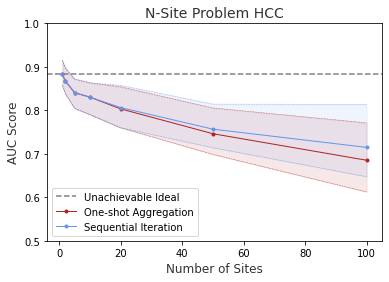

WilcoxonResult(statistic=1555.0, pvalue=2.4889966477411443e-07)

In [99]:
# Visualize for HCC

for exp in range(1, 4):
    exec(f"path_1_{exp}_HCC = '/Users/greg/Downloads/AR_Master_Thesis/output/vis_HCC_1_{exp}.csv'")

# Import and transform data based on specified paths. Visualize NOW!
df_1_1 = pd.read_csv(path_1_1_HCC, index_col=False)
df_1_2 = pd.read_csv(path_1_2_HCC, index_col=False)
df_1_3 = pd.read_csv(path_1_3_HCC, index_col=False)

def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = '%s' % n
    return percentile_

# column.agg([np.sum, np.mean, np.std, np.median, np.var, np.min, np.max, percentile(25), percentile(75)])
#df_1_1.quantile([.25, .75])
plot_1_1 = df_1_1.groupby(['n', 'e']).agg([np.mean, percentile(25), percentile(75)]).reset_index()
plot_1_2 = df_1_2.groupby(['n', 'e']).agg([np.mean, percentile(25), percentile(75)]).reset_index()
plot_1_3 = df_1_3.groupby(['n', 'e', 'r']).agg([np.mean, percentile(25), percentile(75)]).reset_index()

plot_1_1.columns = ['_'.join(col) for col in plot_1_1.columns]
plot_1_2.columns = ['_'.join(col) for col in plot_1_2.columns]
plot_1_3.columns = ['_'.join(col) for col in plot_1_3.columns]

fig, ax = plt.subplots(1, 1, sharey=True) # , figsize=(6,5)
# Plot mean estimate as a line


line_2, = plt.plot('n_', 'AUC Score_mean', data = plot_1_2, linewidth=1, alpha=1, color="firebrick", marker='.')
plt.plot('n_', 'AUC Score_25', data = plot_1_2, linewidth=0.5, alpha=0.7, color="firebrick", linestyle='--')
plt.plot('n_', 'AUC Score_75', data = plot_1_2, linewidth=0.5, alpha=0.7, color="firebrick", linestyle='--')

# Fill between the upper and lower bands
plt.fill_between(x = 'n_', 
                 y1 = 'AUC Score_25', y2 = 'AUC Score_75', 
                 data = plot_1_2, alpha=0.1, color="firebrick")

line_3, = plt.plot('n_', 'AUC Score_mean', data = plot_1_3, linewidth=1, alpha=1, color="cornflowerblue", marker='.')
plt.plot('n_', 'AUC Score_25', data = plot_1_3, linewidth=0.5, alpha=0.7, color="cornflowerblue", linestyle='--')
plt.plot('n_', 'AUC Score_75', data = plot_1_3, linewidth=0.5, alpha=0.7, color="cornflowerblue", linestyle='--')

# Fill between the upper and lower bands
plt.fill_between(x = 'n_', 
                 y1 = 'AUC Score_25', y2 = 'AUC Score_75', 
                 data = plot_1_3, alpha=0.1, color="cornflowerblue")

line_1 = plt.axhline(y=plot_1_1.at[0, 'AUC Score_mean'], color='grey', linestyle='--')


plt.title("N-Site Problem HCC", alpha=0.8, fontsize=14)
plt.xlabel("Number of Sites", alpha=0.8, fontsize=12)
plt.ylabel("AUC Score", alpha=0.8, fontsize=12)
plt.ylim([0.5, 1])

plt.legend((line_1, line_2, line_3), ('Unachievable Ideal', 'One-shot Aggregation', 'Sequential Iteration'))

# Save the figure to file
fig.savefig(path_vis_local + "vis_n_sites_HCC.png")
fig.savefig(path_vis_iCloud + "vis_n_sites_HCC.png")
plt.show()

wilcoxon(df_1_2['AUC Score'], df_1_3['AUC Score'])

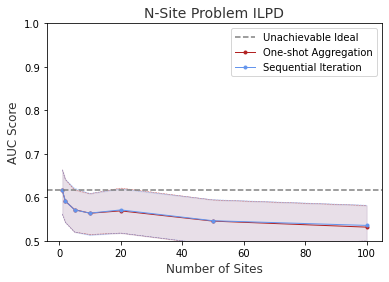

WilcoxonResult(statistic=4512.5, pvalue=0.2505306588404007)

In [100]:
# Visualize for ILPD
for exp in range(1, 4):
    exec(f"path_1_{exp}_ILPD = '/Users/greg/Downloads/AR_Master_Thesis/output/vis_ILPD_1_{exp}.csv'")

# path_1_1 = "/Users/greg/Downloads/AR_Master_Thesis/output/vis_HCC_1_1.csv"
# path_1_2 = "/Users/greg/Downloads/AR_Master_Thesis/output/vis_HCC_1_2.csv"
# path_1_3 = "/Users/greg/Downloads/AR_Master_Thesis/output/vis_HCC_1_3.csv"

# Import and transform data based on specified paths. Visualize NOW!
df_1_1 = pd.read_csv(path_1_1_ILPD, index_col=False)
df_1_2 = pd.read_csv(path_1_2_ILPD, index_col=False)
df_1_3 = pd.read_csv(path_1_3_ILPD, index_col=False)

def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = '%s' % n
    return percentile_

# column.agg([np.sum, np.mean, np.std, np.median, np.var, np.min, np.max, percentile(25), percentile(75)])
#df_1_1.quantile([.25, .75])
plot_1_1 = df_1_1.groupby(['n', 'e']).agg([np.mean, percentile(25), percentile(75)]).reset_index()
plot_1_2 = df_1_2.groupby(['n', 'e']).agg([np.mean, percentile(25), percentile(75)]).reset_index()
plot_1_3 = df_1_3.groupby(['n', 'e', 'r']).agg([np.mean, percentile(25), percentile(75)]).reset_index()

plot_1_1.columns = ['_'.join(col) for col in plot_1_1.columns]
plot_1_2.columns = ['_'.join(col) for col in plot_1_2.columns]
plot_1_3.columns = ['_'.join(col) for col in plot_1_3.columns]


fig, ax = plt.subplots(1, 1, sharey=True) # , figsize=(6,5)
# Plot mean estimate as a line
line_2, = plt.plot('n_', 'AUC Score_mean', data = plot_1_2, linewidth=1, alpha=1, color="firebrick", marker='.')
plt.plot('n_', 'AUC Score_25', data = plot_1_2, linewidth=0.5, alpha=0.7, color="firebrick", linestyle='--')
plt.plot('n_', 'AUC Score_75', data = plot_1_2, linewidth=0.5, alpha=0.7, color="firebrick", linestyle='--')

# Fill between the upper and lower bands
plt.fill_between(x = 'n_', 
                 y1 = 'AUC Score_25', y2 = 'AUC Score_75', 
                 data = plot_1_2, alpha=0.1, color="firebrick")

line_3, = plt.plot('n_', 'AUC Score_mean', data = plot_1_3, linewidth=1, alpha=1, color="cornflowerblue", marker='.')
plt.plot('n_', 'AUC Score_25', data = plot_1_3, linewidth=0.5, alpha=0.7, color="cornflowerblue", linestyle='--')
plt.plot('n_', 'AUC Score_75', data = plot_1_3, linewidth=0.5, alpha=0.7, color="cornflowerblue", linestyle='--')

# Fill between the upper and lower bands
plt.fill_between(x = 'n_', 
                 y1 = 'AUC Score_25', y2 = 'AUC Score_75', 
                 data = plot_1_3, alpha=0.1, color="cornflowerblue")

line_1 = plt.axhline(y=plot_1_1.at[0, 'AUC Score_mean'], color='grey', linestyle='--')

plt.title("N-Site Problem ILPD", alpha=0.8, fontsize=14)
plt.xlabel("Number of Sites", alpha=0.8, fontsize=12)
plt.ylabel("AUC Score", alpha=0.8, fontsize=12)
plt.ylim([0.5, 1])

plt.legend((line_1, line_2, line_3), ('Unachievable Ideal', 'One-shot Aggregation', 'Sequential Iteration'))

# Save the figure to file
fig.savefig(path_vis_local + "vis_n_sites_ILPD.png")
fig.savefig(path_vis_iCloud + "vis_n_sites_ILPD.png")
plt.show()

wilcoxon(df_1_2['AUC Score'], df_1_3['AUC Score'])

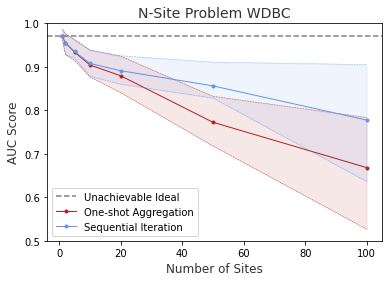

WilcoxonResult(statistic=4442.5, pvalue=4.828092295061642e-26)

In [140]:
# Visualize for BRCA
for exp in range(1, 4):
    exec(f"path_1_{exp}_BRCA = '/Users/greg/Downloads/AR_Master_Thesis/output/vis_BRCA_1_{exp}.csv'")

# path_1_1 = "/Users/greg/Downloads/AR_Master_Thesis/output/vis_HCC_1_1.csv"
# path_1_2 = "/Users/greg/Downloads/AR_Master_Thesis/output/vis_HCC_1_2.csv"
# path_1_3 = "/Users/greg/Downloads/AR_Master_Thesis/output/vis_HCC_1_3.csv"

# Import and transform data based on specified paths. Visualize NOW!
df_1_1 = pd.read_csv(path_1_1_BRCA, index_col=False)
df_1_2 = pd.read_csv(path_1_2_BRCA, index_col=False)
df_1_3 = pd.read_csv(path_1_3_BRCA, index_col=False)

def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = '%s' % n
    return percentile_

# column.agg([np.sum, np.mean, np.std, np.median, np.var, np.min, np.max, percentile(25), percentile(75)])
#df_1_1.quantile([.25, .75])
plot_1_1 = df_1_1.groupby(['n', 'e']).agg([np.mean, percentile(25), percentile(75)]).reset_index()
plot_1_2 = df_1_2.groupby(['n', 'e']).agg([np.mean, percentile(25), percentile(75)]).reset_index()
plot_1_3 = df_1_3.groupby(['n', 'e', 'r']).agg([np.mean, percentile(25), percentile(75)]).reset_index()

plot_1_1.columns = ['_'.join(col) for col in plot_1_1.columns]
plot_1_2.columns = ['_'.join(col) for col in plot_1_2.columns]
plot_1_3.columns = ['_'.join(col) for col in plot_1_3.columns]


fig, ax = plt.subplots(1, 1, sharey=True) # , figsize=(6,5)
# Plot mean estimate as a line
line_2, = plt.plot('n_', 'AUC Score_mean', data = plot_1_2, linewidth=1, alpha=1, color="firebrick", marker='.')
plt.plot('n_', 'AUC Score_25', data = plot_1_2, linewidth=0.5, alpha=0.7, color="firebrick", linestyle='--')
plt.plot('n_', 'AUC Score_75', data = plot_1_2, linewidth=0.5, alpha=0.7, color="firebrick", linestyle='--')

# Fill between the upper and lower bands
plt.fill_between(x = 'n_', 
                 y1 = 'AUC Score_25', y2 = 'AUC Score_75', 
                 data = plot_1_2, alpha=0.1, color="firebrick")

line_3, = plt.plot('n_', 'AUC Score_mean', data = plot_1_3, linewidth=1, alpha=1, color="cornflowerblue", marker='.')
plt.plot('n_', 'AUC Score_25', data = plot_1_3, linewidth=0.5, alpha=0.7, color="cornflowerblue", linestyle='--')
plt.plot('n_', 'AUC Score_75', data = plot_1_3, linewidth=0.5, alpha=0.7, color="cornflowerblue", linestyle='--')

# Fill between the upper and lower bands
plt.fill_between(x = 'n_', 
                 y1 = 'AUC Score_25', y2 = 'AUC Score_75', 
                 data = plot_1_3, alpha=0.1, color="cornflowerblue")

line_1 = plt.axhline(y=plot_1_1.at[0, 'AUC Score_mean'], color='grey', linestyle='--')

plt.title("N-Site Problem WDBC", alpha=0.8, fontsize=14)
plt.xlabel("Number of Sites", alpha=0.8, fontsize=12)
plt.ylabel("AUC Score", alpha=0.8, fontsize=12)
plt.ylim([0.5, 1])

plt.legend((line_1, line_2, line_3), ('Unachievable Ideal', 'One-shot Aggregation', 'Sequential Iteration'))

# Save the figure to file
fig.savefig(path_vis_local + "vis_n_sites_BRCA.png")
fig.savefig(path_vis_iCloud + "vis_n_sites_BRCA.png")
plt.show()

wilcoxon(df_1_2['AUC Score'], df_1_3['AUC Score'])

### Vis 2: Inter-Site Sample Size Imbalance

Aggregated Unweighted vs. Aggregated Weighted: WilcoxonResult(statistic=47593.0, pvalue=1.2727332159101518e-83)
Aggregated Unweighted vs. Iterative Unweighted: WilcoxonResult(statistic=76148.0, pvalue=4.721225538545173e-56)
Aggregated Unweighted vs. Iterative Weighted: WilcoxonResult(statistic=74707.5, pvalue=2.3311665296341617e-67)
Aggregated Weighted vs. Iterative Unweighted: WilcoxonResult(statistic=188477.5, pvalue=3.5716930827753093e-08)
Aggregated Weighted vs. Iterative Weighted: WilcoxonResult(statistic=182886.5, pvalue=0.18822540354519424)
Iterative Unweighted vs. Iterative Weighted: WilcoxonResult(statistic=83356.5, pvalue=2.468820887105353e-09)


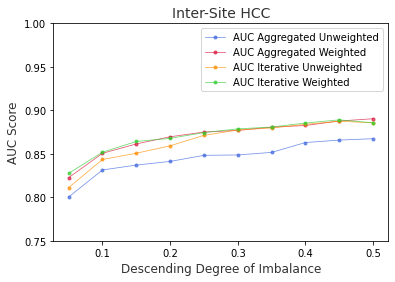

In [138]:
path_HCC = 'HCC' # Prepare data for inter-site sample size imbalance experiments

path_2_2_u = f"/Users/greg/Downloads/AR_Master_Thesis/output/vis_{path_HCC}_2_2_unweighted.csv"
path_2_2_w = f"/Users/greg/Downloads/AR_Master_Thesis/output/vis_{path_HCC}_2_2_weighted.csv"
path_2_3_u = f"/Users/greg/Downloads/AR_Master_Thesis/output/vis_{path_HCC}_2_3_unweighted.csv"
path_2_3_w = f"/Users/greg/Downloads/AR_Master_Thesis/output/vis_{path_HCC}_2_3_weighted.csv"

df_2_2_u = pd.read_csv(path_2_2_u, index_col=False)
df_2_2_w = pd.read_csv(path_2_2_w, index_col=False)
df_2_3_u = pd.read_csv(path_2_3_u, index_col=False)
df_2_3_w = pd.read_csv(path_2_3_w, index_col=False)

print(f"Aggregated Unweighted vs. Aggregated Weighted: {wilcoxon(df_2_2_u['AUC Score'], df_2_2_w['AUC Score'], alternative='less')}")
print(f"Aggregated Unweighted vs. Iterative Unweighted: {wilcoxon(df_2_2_u['AUC Score'], df_2_3_u['AUC Score'], alternative='less')}")
print(f"Aggregated Unweighted vs. Iterative Weighted: {wilcoxon(df_2_2_u['AUC Score'], df_2_3_w['AUC Score'], alternative='less')}")

print(f"Aggregated Weighted vs. Iterative Unweighted: {wilcoxon(df_2_2_w['AUC Score'], df_2_3_u['AUC Score'], alternative='greater')}")
print(f"Aggregated Weighted vs. Iterative Weighted: {wilcoxon(df_2_2_w['AUC Score'], df_2_3_w['AUC Score'], alternative='less')}")

print(f"Iterative Unweighted vs. Iterative Weighted: {wilcoxon(df_2_3_u['AUC Score'], df_2_3_w['AUC Score'], alternative='less')}")

df_2_2_u = df_2_2_u.groupby(['Degree Imbalance']).agg('mean').reset_index()
df_2_2_w = df_2_2_w.groupby(['Degree Imbalance']).agg('mean').reset_index()
df_2_3_u = df_2_3_u.groupby(['Degree Imbalance']).agg('mean').reset_index()
df_2_3_w = df_2_3_w.groupby(['Degree Imbalance']).agg('mean').reset_index()

df_2_2_u = df_2_2_u.rename(columns={"F-1 Score": "f_1_22u", "MCC Score": "mcc_22u", "AUC Score": "auc_22u", "ACC Score": "acc_22u", "Degree Imbalance": "imb"}).drop(columns=['s'])
df_2_2_w = df_2_2_w.rename(columns={"F-1 Score": "f_1_22w", "MCC Score": "mcc_22w", "AUC Score": "auc_22w", "ACC Score": "acc_22w", "Degree Imbalance": "imb"}).drop(columns=['s'])
df_2_3_u = df_2_3_u.rename(columns={"F-1 Score": "f_1_23u", "MCC Score": "mcc_23u", "AUC Score": "auc_23u", "ACC Score": "acc_23u", "Degree Imbalance": "imb"}).drop(columns=['s'])
df_2_3_w = df_2_3_w.rename(columns={"F-1 Score": "f_1_23w", "MCC Score": "mcc_23w", "AUC Score": "auc_23w", "ACC Score": "acc_23w", "Degree Imbalance": "imb"}).drop(columns=['s'])

df_2_x_x = df_2_2_u.join(df_2_2_w.set_index('imb'), on='imb').join(df_2_3_u.set_index('imb'), on='imb').join(df_2_3_w.set_index('imb'), on='imb')
#pd.merge(df_2_2_u, df_2_2_w, on="Degree Imbalance", how='inner')

# And plot it
fig, ax = plt.subplots(1, 1, sharey=True) # , figsize=(6,5)
# Plot mean estimate as a line
# plt.plot('n_', 'AUC Score_mean', data = plot_1_2, linewidth=1, alpha=1, color="crimson", marker='o')
plt.plot('imb', 'auc_22u', data = df_2_x_x, linewidth=0.8, alpha=0.7, label='AUC Aggregated Unweighted', color="royalblue", linestyle='-', marker='.')
plt.plot('imb', 'auc_22w', data = df_2_x_x, linewidth=0.8, alpha=0.7, label='AUC Aggregated Weighted', color="crimson", linestyle='-', marker='.')
plt.plot('imb', 'auc_23u', data = df_2_x_x, linewidth=0.8, alpha=0.7, label='AUC Iterative Unweighted', color="darkorange", linestyle='-', marker='.')
plt.plot('imb', 'auc_23w', data = df_2_x_x, linewidth=0.8, alpha=0.7, label='AUC Iterative Weighted', color="limegreen", linestyle='-', marker='.')

# plt.axhline(y=0.883067, color='grey', linestyle='--')

plt.title(f"Inter-Site {path_HCC}", alpha=0.8, fontsize=14)
plt.xlabel("Descending Degree of Imbalance", alpha=0.8, fontsize=12)
plt.ylabel("AUC Score", alpha=0.8, fontsize=12)
plt.ylim([0.75, 1])

# plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.legend()

# Save the figure to file
fig.savefig(path_vis_local + "vis_inter_site_imbalance_HCC.png")
fig.savefig(path_vis_iCloud + "vis_inter_site_imbalance_HCC.png")
plt.show()


Aggregated Unweighted vs. Aggregated Weighted: WilcoxonResult(statistic=187751.0, pvalue=1.6020394945861906e-06)
Aggregated Unweighted vs. Iterative Unweighted: WilcoxonResult(statistic=193958.5, pvalue=7.13536093769919e-05)
Aggregated Unweighted vs. Iterative Weighted: WilcoxonResult(statistic=208260.5, pvalue=0.0004309503819529893)
Aggregated Weighted vs. Iterative Unweighted: WilcoxonResult(statistic=197352.0, pvalue=0.23280718356727392)
Aggregated Weighted vs. Iterative Weighted: WilcoxonResult(statistic=228055.5, pvalue=0.7217273522340644)
Iterative Unweighted vs. Iterative Weighted: WilcoxonResult(statistic=166832.0, pvalue=0.8752469854150894)


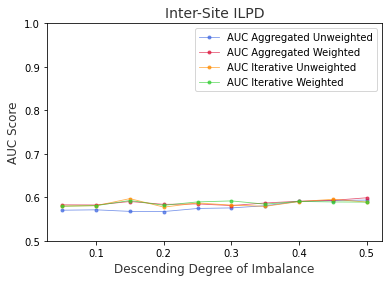

In [111]:
path_ILPD = 'ILPD' # Prepare data for inter-site sample size imbalance experiments

path_2_2_u = f"/Users/greg/Downloads/AR_Master_Thesis/output/vis_{path_ILPD}_2_2_unweighted.csv"
path_2_2_w = f"/Users/greg/Downloads/AR_Master_Thesis/output/vis_{path_ILPD}_2_2_weighted.csv"
path_2_3_u = f"/Users/greg/Downloads/AR_Master_Thesis/output/vis_{path_ILPD}_2_3_unweighted.csv"
path_2_3_w = f"/Users/greg/Downloads/AR_Master_Thesis/output/vis_{path_ILPD}_2_3_weighted.csv"

df_2_2_u = pd.read_csv(path_2_2_u, index_col=False)
df_2_2_w = pd.read_csv(path_2_2_w, index_col=False)
df_2_3_u = pd.read_csv(path_2_3_u, index_col=False)
df_2_3_w = pd.read_csv(path_2_3_w, index_col=False)

print(f"Aggregated Unweighted vs. Aggregated Weighted: {wilcoxon(df_2_2_u['AUC Score'], df_2_2_w['AUC Score'])}")
print(f"Aggregated Unweighted vs. Iterative Unweighted: {wilcoxon(df_2_2_u['AUC Score'], df_2_3_u['AUC Score'])}")
print(f"Aggregated Unweighted vs. Iterative Weighted: {wilcoxon(df_2_2_u['AUC Score'], df_2_3_w['AUC Score'])}")

print(f"Aggregated Weighted vs. Iterative Unweighted: {wilcoxon(df_2_2_w['AUC Score'], df_2_3_u['AUC Score'])}")
print(f"Aggregated Weighted vs. Iterative Weighted: {wilcoxon(df_2_2_w['AUC Score'], df_2_3_w['AUC Score'])}")

print(f"Iterative Unweighted vs. Iterative Weighted: {wilcoxon(df_2_3_u['AUC Score'], df_2_3_w['AUC Score'])}")

df_2_2_u = df_2_2_u.groupby(['Degree Imbalance']).agg('mean').reset_index()
df_2_2_w = df_2_2_w.groupby(['Degree Imbalance']).agg('mean').reset_index()
df_2_3_u = df_2_3_u.groupby(['Degree Imbalance']).agg('mean').reset_index()
df_2_3_w = df_2_3_w.groupby(['Degree Imbalance']).agg('mean').reset_index()

df_2_2_u = df_2_2_u.rename(columns={"F-1 Score": "f_1_22u", "MCC Score": "mcc_22u", "AUC Score": "auc_22u", "ACC Score": "acc_22u", "Degree Imbalance": "imb"}).drop(columns=['s'])
df_2_2_w = df_2_2_w.rename(columns={"F-1 Score": "f_1_22w", "MCC Score": "mcc_22w", "AUC Score": "auc_22w", "ACC Score": "acc_22w", "Degree Imbalance": "imb"}).drop(columns=['s'])
df_2_3_u = df_2_3_u.rename(columns={"F-1 Score": "f_1_23u", "MCC Score": "mcc_23u", "AUC Score": "auc_23u", "ACC Score": "acc_23u", "Degree Imbalance": "imb"}).drop(columns=['s'])
df_2_3_w = df_2_3_w.rename(columns={"F-1 Score": "f_1_23w", "MCC Score": "mcc_23w", "AUC Score": "auc_23w", "ACC Score": "acc_23w", "Degree Imbalance": "imb"}).drop(columns=['s'])

df_2_x_x = df_2_2_u.join(df_2_2_w.set_index('imb'), on='imb').join(df_2_3_u.set_index('imb'), on='imb').join(df_2_3_w.set_index('imb'), on='imb')
#pd.merge(df_2_2_u, df_2_2_w, on="Degree Imbalance", how='inner')

# And plot it
fig, ax = plt.subplots(1, 1, sharey=True) # , figsize=(6,5)
# Plot mean estimate as a line
# plt.plot('n_', 'AUC Score_mean', data = plot_1_2, linewidth=1, alpha=1, color="crimson", marker='o')
plt.plot('imb', 'auc_22u', data = df_2_x_x, linewidth=0.8, alpha=0.7, label='AUC Aggregated Unweighted', color="royalblue", linestyle='-', marker='.')
plt.plot('imb', 'auc_22w', data = df_2_x_x, linewidth=0.8, alpha=0.7, label='AUC Aggregated Weighted', color="crimson", linestyle='-', marker='.')
plt.plot('imb', 'auc_23u', data = df_2_x_x, linewidth=0.8, alpha=0.7, label='AUC Iterative Unweighted', color="darkorange", linestyle='-', marker='.')
plt.plot('imb', 'auc_23w', data = df_2_x_x, linewidth=0.8, alpha=0.7, label='AUC Iterative Weighted', color="limegreen", linestyle='-', marker='.')

# plt.axhline(y=0.883067, color='grey', linestyle='--')

plt.title(f"Inter-Site {path_ILPD}", alpha=0.8, fontsize=14)
plt.xlabel("Descending Degree of Imbalance", alpha=0.8, fontsize=12)
plt.ylabel("AUC Score", alpha=0.8, fontsize=12)
plt.ylim([0.5, 1])

# plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.legend()

# Save the figure to file
fig.savefig(path_vis_local + "vis_inter_site_imbalance_ILPD.png")
fig.savefig(path_vis_iCloud + "vis_inter_site_imbalance_ILPD.png")

plt.show()


Aggregated Unweighted vs. Aggregated Weighted: WilcoxonResult(statistic=25366.5, pvalue=1.3060346263526747e-74)
Aggregated Unweighted vs. Iterative Unweighted: WilcoxonResult(statistic=61879.0, pvalue=3.5320366013411917e-22)
Aggregated Unweighted vs. Iterative Weighted: WilcoxonResult(statistic=67337.5, pvalue=3.5757398476306897e-38)
Aggregated Weighted vs. Iterative Unweighted: WilcoxonResult(statistic=34224.0, pvalue=3.674762734777515e-43)
Aggregated Weighted vs. Iterative Weighted: WilcoxonResult(statistic=59536.0, pvalue=9.039856928711004e-18)
Iterative Unweighted vs. Iterative Weighted: WilcoxonResult(statistic=35148.0, pvalue=5.266682396285961e-15)


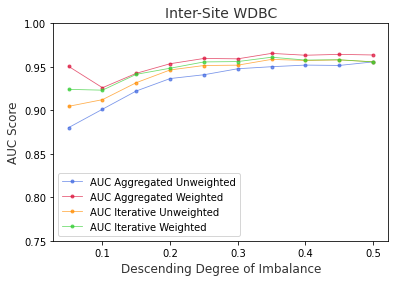

In [139]:
path_BRCA = 'BRCA' # Prepare data for inter-site sample size imbalance experiments

path_2_2_u = f"/Users/greg/Downloads/AR_Master_Thesis/output/vis_{path_BRCA}_2_2_unweighted.csv"
path_2_2_w = f"/Users/greg/Downloads/AR_Master_Thesis/output/vis_{path_BRCA}_2_2_weighted.csv"
path_2_3_u = f"/Users/greg/Downloads/AR_Master_Thesis/output/vis_{path_BRCA}_2_3_unweighted.csv"
path_2_3_w = f"/Users/greg/Downloads/AR_Master_Thesis/output/vis_{path_BRCA}_2_3_weighted.csv"

df_2_2_u = pd.read_csv(path_2_2_u, index_col=False)
df_2_2_w = pd.read_csv(path_2_2_w, index_col=False)
df_2_3_u = pd.read_csv(path_2_3_u, index_col=False)
df_2_3_w = pd.read_csv(path_2_3_w, index_col=False)

print(f"Aggregated Unweighted vs. Aggregated Weighted: {wilcoxon(df_2_2_u['AUC Score'], df_2_2_w['AUC Score'])}")
print(f"Aggregated Unweighted vs. Iterative Unweighted: {wilcoxon(df_2_2_u['AUC Score'], df_2_3_u['AUC Score'])}")
print(f"Aggregated Unweighted vs. Iterative Weighted: {wilcoxon(df_2_2_u['AUC Score'], df_2_3_w['AUC Score'])}")

print(f"Aggregated Weighted vs. Iterative Unweighted: {wilcoxon(df_2_2_w['AUC Score'], df_2_3_u['AUC Score'])}")
print(f"Aggregated Weighted vs. Iterative Weighted: {wilcoxon(df_2_2_w['AUC Score'], df_2_3_w['AUC Score'])}")

print(f"Iterative Unweighted vs. Iterative Weighted: {wilcoxon(df_2_3_u['AUC Score'], df_2_3_w['AUC Score'])}")

df_2_2_u = df_2_2_u.groupby(['Degree Imbalance']).agg('mean').reset_index()
df_2_2_w = df_2_2_w.groupby(['Degree Imbalance']).agg('mean').reset_index()
df_2_3_u = df_2_3_u.groupby(['Degree Imbalance']).agg('mean').reset_index()
df_2_3_w = df_2_3_w.groupby(['Degree Imbalance']).agg('mean').reset_index()

df_2_2_u = df_2_2_u.rename(columns={"F-1 Score": "f_1_22u", "MCC Score": "mcc_22u", "AUC Score": "auc_22u", "ACC Score": "acc_22u", "Degree Imbalance": "imb"}).drop(columns=['s'])
df_2_2_w = df_2_2_w.rename(columns={"F-1 Score": "f_1_22w", "MCC Score": "mcc_22w", "AUC Score": "auc_22w", "ACC Score": "acc_22w", "Degree Imbalance": "imb"}).drop(columns=['s'])
df_2_3_u = df_2_3_u.rename(columns={"F-1 Score": "f_1_23u", "MCC Score": "mcc_23u", "AUC Score": "auc_23u", "ACC Score": "acc_23u", "Degree Imbalance": "imb"}).drop(columns=['s'])
df_2_3_w = df_2_3_w.rename(columns={"F-1 Score": "f_1_23w", "MCC Score": "mcc_23w", "AUC Score": "auc_23w", "ACC Score": "acc_23w", "Degree Imbalance": "imb"}).drop(columns=['s'])

df_2_x_x = df_2_2_u.join(df_2_2_w.set_index('imb'), on='imb').join(df_2_3_u.set_index('imb'), on='imb').join(df_2_3_w.set_index('imb'), on='imb')
#pd.merge(df_2_2_u, df_2_2_w, on="Degree Imbalance", how='inner')

# And plot it
fig, ax = plt.subplots(1, 1, sharey=True) # , figsize=(6,5)
# Plot mean estimate as a line
# plt.plot('n_', 'AUC Score_mean', data = plot_1_2, linewidth=1, alpha=1, color="crimson", marker='o')
plt.plot('imb', 'auc_22u', data = df_2_x_x, linewidth=0.8, alpha=0.7, label='AUC Aggregated Unweighted', color="royalblue", linestyle='-', marker='.')
plt.plot('imb', 'auc_22w', data = df_2_x_x, linewidth=0.8, alpha=0.7, label='AUC Aggregated Weighted', color="crimson", linestyle='-', marker='.')
plt.plot('imb', 'auc_23u', data = df_2_x_x, linewidth=0.8, alpha=0.7, label='AUC Iterative Unweighted', color="darkorange", linestyle='-', marker='.')
plt.plot('imb', 'auc_23w', data = df_2_x_x, linewidth=0.8, alpha=0.7, label='AUC Iterative Weighted', color="limegreen", linestyle='-', marker='.')

# plt.axhline(y=0.883067, color='grey', linestyle='--')

plt.title(f"Inter-Site WDBC", alpha=0.8, fontsize=14)
plt.xlabel("Descending Degree of Imbalance", alpha=0.8, fontsize=12)
plt.ylabel("AUC Score", alpha=0.8, fontsize=12)
plt.ylim([0.75, 1])

# plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.legend()

# Save the figure to file
fig.savefig(path_vis_local + "vis_inter_site_imbalance_BRCA.png")
fig.savefig(path_vis_iCloud + "vis_inter_site_imbalance_BRCA.png")

plt.show()


### Vis 3: Communication Efficiency

HCC

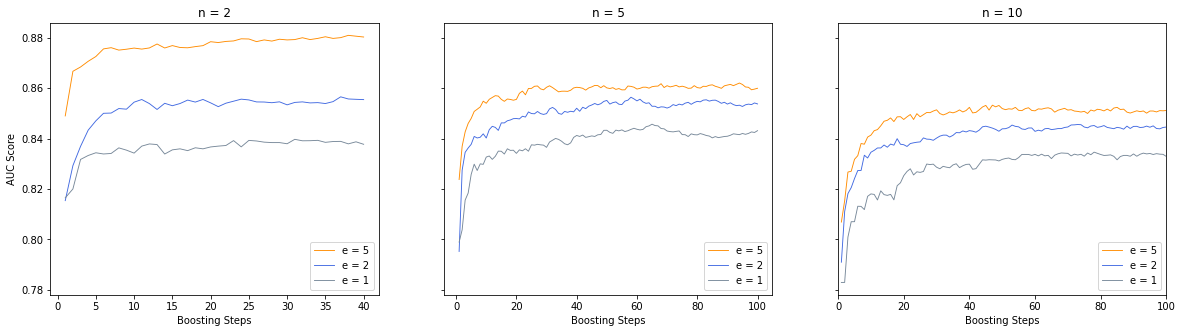

In [76]:
# Communication Efficiency for HCC
path_comm_effi_HCC = "/Users/greg/Downloads/AR_Master_Thesis/output/vis_HCC_comm_effi.csv"
df_HCC = pd.read_csv(path_comm_effi_HCC, index_col=False)
df_HCC = df_HCC.groupby(['r', 'n', 'e', 'v']).agg(["mean"]).reset_index()
df_HCC.columns = ['_'.join(col) for col in df_HCC.columns]

# plt.style.use("tableau-colorblind10")

# Decrase interval thickness as interval widens
ax_indx = [0, 1, 2]
n_sites = [2, 5, 10]

l_rates = [5, 2, 1]
colors = ['darkorange', 'royalblue', 'lightslategrey']

fig, ax = plt.subplots(1, 3, sharey=True, figsize=(20,5))

for i, n in zip(ax_indx, n_sites):
    for e, c in zip(l_rates, colors): 
        ax[i].plot(
            df_HCC[(df_HCC["n_"]==n) & (df_HCC["e_"]==e)]["v_"], 
            df_HCC[(df_HCC["n_"]==n) & (df_HCC["e_"]==e)]["auc_mean"], 
            linestyle='solid', 
            linewidth=0.9, 
            color=c, 
            label=f'e = {e}'
        )
        ax[i].legend(loc='lower right')
        ax[i].set_title(f'n = {n}')
        

plt.setp(ax[:], xlabel='Boosting Steps', alpha=0.8)
plt.setp(ax[0], ylabel='AUC Score', alpha=0.8)

plt.xlim([0, 100])
# plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))

#plt.legend()
# Save the figure to file
fig.savefig(path_vis_local + "vis_comm_effi_HCC.png")
fig.savefig(path_vis_iCloud + "vis_comm_effi_HCC.png")

plt.show()

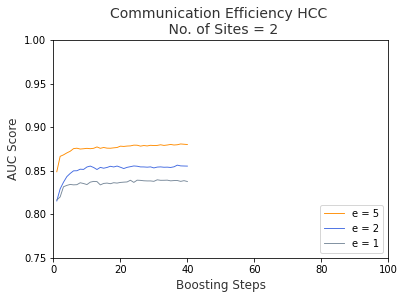

In [120]:
# Communication Efficiency for HCC
path_comm_effi_HCC = "/Users/greg/Downloads/AR_Master_Thesis/output/vis_HCC_comm_effi.csv"
df_HCC = pd.read_csv(path_comm_effi_HCC, index_col=False)
df_HCC = df_HCC.groupby(['r', 'n', 'e', 'v']).agg(["mean"]).reset_index()
df_HCC.columns = ['_'.join(col) for col in df_HCC.columns]

# plt.style.use("tableau-colorblind10")

# Decrase interval thickness as interval widens
# ax_indx = [0, 1, 2]
# n_sites = [2, 5, 10]
n = 2

l_rates = [5, 2, 1]
colors = ['darkorange', 'royalblue', 'lightslategrey']

fig, ax = plt.subplots(1, 1, sharey=True)


for e, c in zip(l_rates, colors): 
    ax.plot(
        df_HCC[(df_HCC["n_"]==n) & (df_HCC["e_"]==e)]["v_"], 
        df_HCC[(df_HCC["n_"]==n) & (df_HCC["e_"]==e)]["auc_mean"], 
        linestyle='solid', 
        linewidth=0.9, 
        color=c, 
        label=f'e = {e}'
    )

ax.legend(loc='lower right')
# ax.set_title(f'n = {n}')

# plt.setp(ax, xlabel='Boosting Steps', alpha=0.8, fontsize=12)
# plt.setp(ax, ylabel='AUC Score', alpha=0.8, fontsize=12)

plt.title(f"Communication Efficiency HCC \n No. of Sites = {n}", alpha=0.8, fontsize=14)
plt.xlabel("Boosting Steps", alpha=0.8, fontsize=12)
plt.ylabel("AUC Score", alpha=0.8, fontsize=12)

plt.xlim([0, 100])
plt.ylim([0.75, 1])
# plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))

# legend = plt.legend(handles=[one, two, three], title="title", loc=4, fontsize='small', fancybox=True)
# plt.legend(title="No. of weak learners \n trained per site per round")
# Save the figure to file
fig.savefig(path_vis_local + f"vis_comm_effi_HCC_n_{n}.png")
fig.savefig(path_vis_iCloud + f"vis_comm_effi_HCC_n_{n}.png")

plt.show()

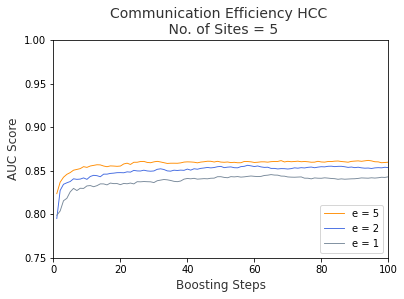

In [121]:
# Communication Efficiency for HCC
path_comm_effi_HCC = "/Users/greg/Downloads/AR_Master_Thesis/output/vis_HCC_comm_effi.csv"
df_HCC = pd.read_csv(path_comm_effi_HCC, index_col=False)
df_HCC = df_HCC.groupby(['r', 'n', 'e', 'v']).agg(["mean"]).reset_index()
df_HCC.columns = ['_'.join(col) for col in df_HCC.columns]

# plt.style.use("tableau-colorblind10")

# Decrase interval thickness as interval widens
# ax_indx = [0, 1, 2]
# n_sites = [2, 5, 10]
n = 5

l_rates = [5, 2, 1]
colors = ['darkorange', 'royalblue', 'lightslategrey']

fig, ax = plt.subplots(1, 1, sharey=True)


for e, c in zip(l_rates, colors): 
    ax.plot(
        df_HCC[(df_HCC["n_"]==n) & (df_HCC["e_"]==e)]["v_"], 
        df_HCC[(df_HCC["n_"]==n) & (df_HCC["e_"]==e)]["auc_mean"], 
        linestyle='solid', 
        linewidth=0.9, 
        color=c, 
        label=f'e = {e}'
    )

ax.legend(loc='lower right')
# ax.set_title(f'n = {n}')

# plt.setp(ax, xlabel='Boosting Steps', alpha=0.8, fontsize=12)
# plt.setp(ax, ylabel='AUC Score', alpha=0.8, fontsize=12)

plt.title(f"Communication Efficiency HCC \n No. of Sites = {n}", alpha=0.8, fontsize=14)
plt.xlabel("Boosting Steps", alpha=0.8, fontsize=12)
plt.ylabel("AUC Score", alpha=0.8, fontsize=12)

plt.xlim([0, 100])
plt.ylim([0.75, 1])
# plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))

# legend = plt.legend(handles=[one, two, three], title="title", loc=4, fontsize='small', fancybox=True)
# plt.legend(title="No. of weak learners \n trained per site per round")
# Save the figure to file
fig.savefig(path_vis_local + f"vis_comm_effi_HCC_n_{n}.png")
fig.savefig(path_vis_iCloud + f"vis_comm_effi_HCC_n_{n}.png")

plt.show()

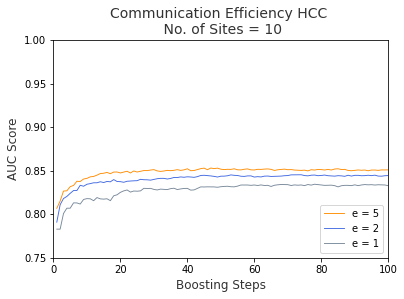

In [122]:
# Communication Efficiency for HCC
path_comm_effi_HCC = "/Users/greg/Downloads/AR_Master_Thesis/output/vis_HCC_comm_effi.csv"
df_HCC = pd.read_csv(path_comm_effi_HCC, index_col=False)
df_HCC = df_HCC.groupby(['r', 'n', 'e', 'v']).agg(["mean"]).reset_index()
df_HCC.columns = ['_'.join(col) for col in df_HCC.columns]

# plt.style.use("tableau-colorblind10")

# Decrase interval thickness as interval widens
# ax_indx = [0, 1, 2]
# n_sites = [2, 5, 10]
n = 10

l_rates = [5, 2, 1]
colors = ['darkorange', 'royalblue', 'lightslategrey']

fig, ax = plt.subplots(1, 1, sharey=True)


for e, c in zip(l_rates, colors): 
    ax.plot(
        df_HCC[(df_HCC["n_"]==n) & (df_HCC["e_"]==e)]["v_"], 
        df_HCC[(df_HCC["n_"]==n) & (df_HCC["e_"]==e)]["auc_mean"], 
        linestyle='solid', 
        linewidth=0.9, 
        color=c, 
        label=f'e = {e}'
    )

ax.legend(loc='lower right')
# ax.set_title(f'n = {n}')

# plt.setp(ax, xlabel='Boosting Steps', alpha=0.8, fontsize=12)
# plt.setp(ax, ylabel='AUC Score', alpha=0.8, fontsize=12)

plt.title(f"Communication Efficiency HCC \n No. of Sites = {n}", alpha=0.8, fontsize=14)
plt.xlabel("Boosting Steps", alpha=0.8, fontsize=12)
plt.ylabel("AUC Score", alpha=0.8, fontsize=12)

plt.xlim([0, 100])
plt.ylim([0.75, 1])
# plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))

# legend = plt.legend(handles=[one, two, three], title="title", loc=4, fontsize='small', fancybox=True)
# plt.legend(title="No. of weak learners \n trained per site per round")
# Save the figure to file
fig.savefig(path_vis_local + f"vis_comm_effi_HCC_n_{n}.png")
fig.savefig(path_vis_iCloud + f"vis_comm_effi_HCC_n_{n}.png")

plt.show()

ILPD

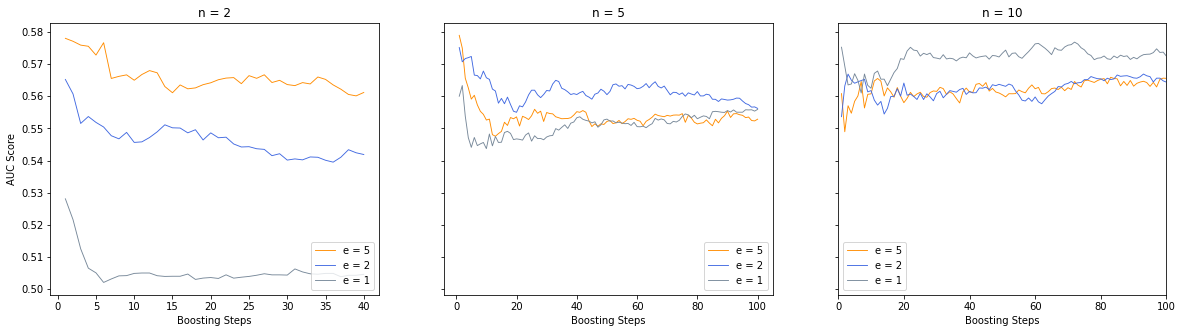

In [80]:
# Communication Efficiency for ILPD
path_comm_effi_ILPD = "/Users/greg/Downloads/AR_Master_Thesis/output/vis_ILPD_comm_effi.csv"
df_ILPD = pd.read_csv(path_comm_effi_ILPD, index_col=False)
df_ILPD = df_ILPD.groupby(['r', 'n', 'e', 'v']).agg(["mean"]).reset_index()
df_ILPD.columns = ['_'.join(col) for col in df_ILPD.columns]

# plt.style.use("tableau-colorblind10")

# Decrase interval thickness as interval widens
ax_indx = [0, 1, 2]
n_sites = [2, 5, 10]

l_rates = [5, 2, 1]
colors = ['darkorange', 'royalblue', 'lightslategrey']

fig, ax = plt.subplots(1, 3, sharey=True, figsize=(20,5))

for i, n in zip(ax_indx, n_sites):
    for e, c in zip(l_rates, colors): 
        ax[i].plot(
            df_ILPD[(df_ILPD["n_"]==n) & (df_ILPD["e_"]==e)]["v_"], 
            df_ILPD[(df_ILPD["n_"]==n) & (df_ILPD["e_"]==e)]["auc_mean"], 
            linestyle='solid', 
            linewidth=0.9, 
            color=c, 
            label=f'e = {e}'
        )
        ax[i].legend(loc='lower right')
        ax[i].set_title(f'n = {n}')

plt.setp(ax[:], xlabel='Boosting Steps', alpha=0.8)
plt.setp(ax[0], ylabel='AUC Score', alpha=0.8)

plt.xlim([0, 100])

# plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.legend()
# Save the figure to file
fig.savefig(path_vis_local + "vis_comm_effi_ILPD.png")
fig.savefig(path_vis_iCloud + "vis_comm_effi_ILPD.png")

plt.show()

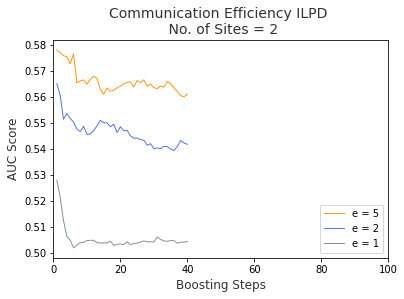

In [81]:
# Communication Efficiency for ILPD
path_comm_effi_ILPD = "/Users/greg/Downloads/AR_Master_Thesis/output/vis_ILPD_comm_effi.csv"
df_ILPD = pd.read_csv(path_comm_effi_ILPD, index_col=False)
df_ILPD = df_ILPD.groupby(['r', 'n', 'e', 'v']).agg(["mean"]).reset_index()
df_ILPD.columns = ['_'.join(col) for col in df_ILPD.columns]

# plt.style.use("tableau-colorblind10")

# Decrase interval thickness as interval widens
# ax_indx = [0, 1, 2]
# n_sites = [2, 5, 10]
n = 2

l_rates = [5, 2, 1]
colors = ['darkorange', 'royalblue', 'lightslategrey']

fig, ax = plt.subplots(1, 1, sharey=True)


for e, c in zip(l_rates, colors): 
    ax.plot(
        df_ILPD[(df_ILPD["n_"]==n) & (df_ILPD["e_"]==e)]["v_"], 
        df_ILPD[(df_ILPD["n_"]==n) & (df_ILPD["e_"]==e)]["auc_mean"], 
        linestyle='solid', 
        linewidth=0.9, 
        color=c, 
        label=f'e = {e}'
    )

ax.legend(loc='lower right')
# ax.set_title(f'n = {n}')

# plt.setp(ax, xlabel='Boosting Steps', alpha=0.8, fontsize=12)
# plt.setp(ax, ylabel='AUC Score', alpha=0.8, fontsize=12)

plt.title(f"Communication Efficiency ILPD \n No. of Sites = {n}", alpha=0.8, fontsize=14)
plt.xlabel("Boosting Steps", alpha=0.8, fontsize=12)
plt.ylabel("AUC Score", alpha=0.8, fontsize=12)

plt.xlim([0, 100])
# plt.ylim([0.75, 1])
# plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))

# legend = plt.legend(handles=[one, two, three], title="title", loc=4, fontsize='small', fancybox=True)
# plt.legend(title="No. of weak learners \n trained per site per round")
# Save the figure to file
fig.savefig(path_vis_local + f"vis_comm_effi_ILPD_n_{n}.png")
fig.savefig(path_vis_iCloud + f"vis_comm_effi_ILPD_n_{n}.png")

plt.show()

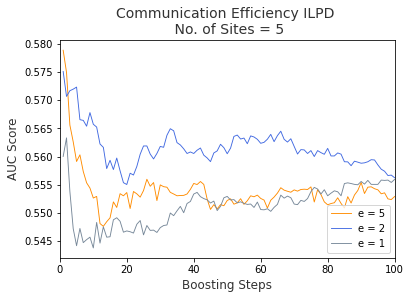

In [82]:
# Communication Efficiency for ILPD
path_comm_effi_ILPD = "/Users/greg/Downloads/AR_Master_Thesis/output/vis_ILPD_comm_effi.csv"
df_ILPD = pd.read_csv(path_comm_effi_ILPD, index_col=False)
df_ILPD = df_ILPD.groupby(['r', 'n', 'e', 'v']).agg(["mean"]).reset_index()
df_ILPD.columns = ['_'.join(col) for col in df_ILPD.columns]

# plt.style.use("tableau-colorblind10")

# Decrase interval thickness as interval widens
# ax_indx = [0, 1, 2]
# n_sites = [2, 5, 10]
n = 5

l_rates = [5, 2, 1]
colors = ['darkorange', 'royalblue', 'lightslategrey']

fig, ax = plt.subplots(1, 1, sharey=True)


for e, c in zip(l_rates, colors): 
    ax.plot(
        df_ILPD[(df_ILPD["n_"]==n) & (df_ILPD["e_"]==e)]["v_"], 
        df_ILPD[(df_ILPD["n_"]==n) & (df_ILPD["e_"]==e)]["auc_mean"], 
        linestyle='solid', 
        linewidth=0.9, 
        color=c, 
        label=f'e = {e}'
    )

ax.legend(loc='lower right')
# ax.set_title(f'n = {n}')

# plt.setp(ax, xlabel='Boosting Steps', alpha=0.8, fontsize=12)
# plt.setp(ax, ylabel='AUC Score', alpha=0.8, fontsize=12)

plt.title(f"Communication Efficiency ILPD \n No. of Sites = {n}", alpha=0.8, fontsize=14)
plt.xlabel("Boosting Steps", alpha=0.8, fontsize=12)
plt.ylabel("AUC Score", alpha=0.8, fontsize=12)

plt.xlim([0, 100])
# plt.ylim([0.75, 1])
# plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))

# legend = plt.legend(handles=[one, two, three], title="title", loc=4, fontsize='small', fancybox=True)
# plt.legend(title="No. of weak learners \n trained per site per round")
# Save the figure to file
fig.savefig(path_vis_local + f"vis_comm_effi_ILPD_n_{n}.png")
fig.savefig(path_vis_iCloud + f"vis_comm_effi_ILPD_n_{n}.png")

plt.show()

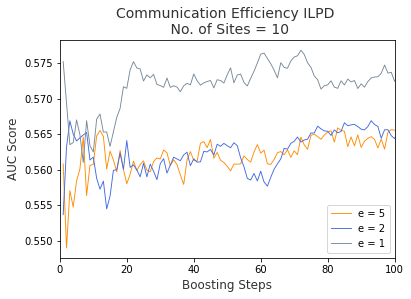

In [83]:
# Communication Efficiency for ILPD
path_comm_effi_ILPD = "/Users/greg/Downloads/AR_Master_Thesis/output/vis_ILPD_comm_effi.csv"
df_ILPD = pd.read_csv(path_comm_effi_ILPD, index_col=False)
df_ILPD = df_ILPD.groupby(['r', 'n', 'e', 'v']).agg(["mean"]).reset_index()
df_ILPD.columns = ['_'.join(col) for col in df_ILPD.columns]

# plt.style.use("tableau-colorblind10")

# Decrase interval thickness as interval widens
# ax_indx = [0, 1, 2]
# n_sites = [2, 5, 10]
n = 10

l_rates = [5, 2, 1]
colors = ['darkorange', 'royalblue', 'lightslategrey']

fig, ax = plt.subplots(1, 1, sharey=True)


for e, c in zip(l_rates, colors): 
    ax.plot(
        df_ILPD[(df_ILPD["n_"]==n) & (df_ILPD["e_"]==e)]["v_"], 
        df_ILPD[(df_ILPD["n_"]==n) & (df_ILPD["e_"]==e)]["auc_mean"], 
        linestyle='solid', 
        linewidth=0.9, 
        color=c, 
        label=f'e = {e}'
    )

ax.legend(loc='lower right')
# ax.set_title(f'n = {n}')

# plt.setp(ax, xlabel='Boosting Steps', alpha=0.8, fontsize=12)
# plt.setp(ax, ylabel='AUC Score', alpha=0.8, fontsize=12)

plt.title(f"Communication Efficiency ILPD \n No. of Sites = {n}", alpha=0.8, fontsize=14)
plt.xlabel("Boosting Steps", alpha=0.8, fontsize=12)
plt.ylabel("AUC Score", alpha=0.8, fontsize=12)

plt.xlim([0, 100])
# plt.ylim([0.75, 1])
# plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))

# legend = plt.legend(handles=[one, two, three], title="title", loc=4, fontsize='small', fancybox=True)
# plt.legend(title="No. of weak learners \n trained per site per round")
# Save the figure to file
fig.savefig(path_vis_local + f"vis_comm_effi_ILPD_n_{n}.png")
fig.savefig(path_vis_iCloud + f"vis_comm_effi_ILPD_n_{n}.png")

plt.show()

WDBC

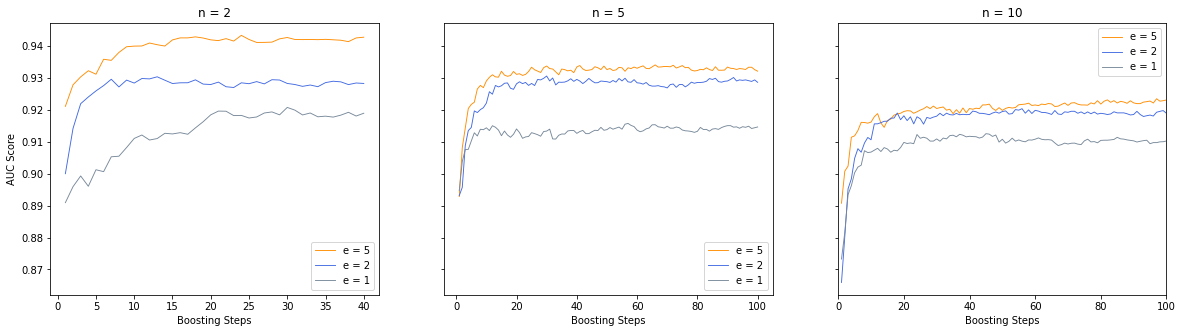

In [84]:
# Communication Efficiency for WDBC
path_comm_effi_BRCA = "/Users/greg/Downloads/AR_Master_Thesis/output/vis_BRCA_comm_effi.csv"
df_BRCA = pd.read_csv(path_comm_effi_BRCA, index_col=False)
df_BRCA = df_BRCA.groupby(['r', 'n', 'e', 'v']).agg(["mean"]).reset_index()
df_BRCA.columns = ['_'.join(col) for col in df_BRCA.columns]

# plt.style.use("tableau-colorblind10")

# Decrase interval thickness as interval widens
ax_indx = [0, 1, 2]
n_sites = [2, 5, 10]

l_rates = [5, 2, 1]
colors = ['darkorange', 'royalblue', 'lightslategrey']

fig, ax = plt.subplots(1, 3, sharey=True, figsize=(20,5))

for i, n in zip(ax_indx, n_sites):
    for e, c in zip(l_rates, colors): 
        ax[i].plot(
            df_BRCA[(df_BRCA["n_"]==n) & (df_BRCA["e_"]==e)]["v_"], 
            df_BRCA[(df_BRCA["n_"]==n) & (df_BRCA["e_"]==e)]["auc_mean"], 
            linestyle='solid', 
            linewidth=0.9, 
            color=c, 
            label=f'e = {e}'
        )
        ax[i].legend(loc='lower right')
        ax[i].set_title(f'n = {n}')

plt.setp(ax[:], xlabel='Boosting Steps', alpha=0.8)
plt.setp(ax[0], ylabel='AUC Score', alpha=0.8)

plt.xlim([0, 100])

# plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.legend()
# Save the figure to file
fig.savefig(path_vis_local + "vis_comm_effi_BRCA.png")
fig.savefig(path_vis_iCloud + "vis_comm_effi_BRCA.png")
plt.show()

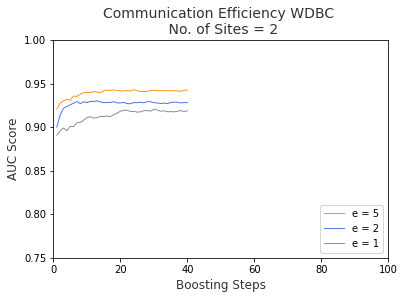

In [142]:
# Communication Efficiency for WDBC
path_comm_effi_BRCA = "/Users/greg/Downloads/AR_Master_Thesis/output/vis_BRCA_comm_effi.csv"
df_BRCA = pd.read_csv(path_comm_effi_BRCA, index_col=False)
df_BRCA = df_BRCA.groupby(['r', 'n', 'e', 'v']).agg(["mean"]).reset_index()
df_BRCA.columns = ['_'.join(col) for col in df_BRCA.columns]

# plt.style.use("tableau-colorblind10")

# Decrase interval thickness as interval widens
# ax_indx = [0, 1, 2]
# n_sites = [2, 5, 10]
n = 2

l_rates = [5, 2, 1]
colors = ['darkorange', 'royalblue', 'lightslategrey']

fig, ax = plt.subplots(1, 1, sharey=True)


for e, c in zip(l_rates, colors): 
    ax.plot(
        df_BRCA[(df_BRCA["n_"]==n) & (df_BRCA["e_"]==e)]["v_"], 
        df_BRCA[(df_BRCA["n_"]==n) & (df_BRCA["e_"]==e)]["auc_mean"], 
        linestyle='solid', 
        linewidth=0.9, 
        color=c, 
        label=f'e = {e}'
    )

ax.legend(loc='lower right')
# ax.set_title(f'n = {n}')

# plt.setp(ax, xlabel='Boosting Steps', alpha=0.8, fontsize=12)
# plt.setp(ax, ylabel='AUC Score', alpha=0.8, fontsize=12)

plt.title(f"Communication Efficiency WDBC \n No. of Sites = {n}", alpha=0.8, fontsize=14)
plt.xlabel("Boosting Steps", alpha=0.8, fontsize=12)
plt.ylabel("AUC Score", alpha=0.8, fontsize=12)

plt.xlim([0, 100])
plt.ylim([0.75, 1])
# plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))

# legend = plt.legend(handles=[one, two, three], title="title", loc=4, fontsize='small', fancybox=True)
# plt.legend(title="No. of weak learners \n trained per site per round")
# Save the figure to file
fig.savefig(path_vis_local + f"vis_comm_effi_BRCA_n_{n}.png")
fig.savefig(path_vis_iCloud + f"vis_comm_effi_BRCA_n_{n}.png")

plt.show()

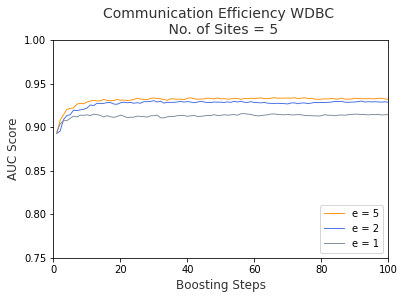

In [143]:
# Communication Efficiency for WDBC
path_comm_effi_BRCA = "/Users/greg/Downloads/AR_Master_Thesis/output/vis_BRCA_comm_effi.csv"
df_BRCA = pd.read_csv(path_comm_effi_BRCA, index_col=False)
df_BRCA = df_BRCA.groupby(['r', 'n', 'e', 'v']).agg(["mean"]).reset_index()
df_BRCA.columns = ['_'.join(col) for col in df_BRCA.columns]

# plt.style.use("tableau-colorblind10")

# Decrase interval thickness as interval widens
# ax_indx = [0, 1, 2]
# n_sites = [2, 5, 10]
n = 5

l_rates = [5, 2, 1]
colors = ['darkorange', 'royalblue', 'lightslategrey']

fig, ax = plt.subplots(1, 1, sharey=True)


for e, c in zip(l_rates, colors): 
    ax.plot(
        df_BRCA[(df_BRCA["n_"]==n) & (df_BRCA["e_"]==e)]["v_"], 
        df_BRCA[(df_BRCA["n_"]==n) & (df_BRCA["e_"]==e)]["auc_mean"], 
        linestyle='solid', 
        linewidth=0.9, 
        color=c, 
        label=f'e = {e}'
    )

ax.legend(loc='lower right')
# ax.set_title(f'n = {n}')

# plt.setp(ax, xlabel='Boosting Steps', alpha=0.8, fontsize=12)
# plt.setp(ax, ylabel='AUC Score', alpha=0.8, fontsize=12)

plt.title(f"Communication Efficiency WDBC \n No. of Sites = {n}", alpha=0.8, fontsize=14)
plt.xlabel("Boosting Steps", alpha=0.8, fontsize=12)
plt.ylabel("AUC Score", alpha=0.8, fontsize=12)

plt.xlim([0, 100])
plt.ylim([0.75, 1])
# plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))

# legend = plt.legend(handles=[one, two, three], title="title", loc=4, fontsize='small', fancybox=True)
# plt.legend(title="No. of weak learners \n trained per site per round")
# Save the figure to file
fig.savefig(path_vis_local + f"vis_comm_effi_BRCA_n_{n}.png")
fig.savefig(path_vis_iCloud + f"vis_comm_effi_BRCA_n_{n}.png")

plt.show()

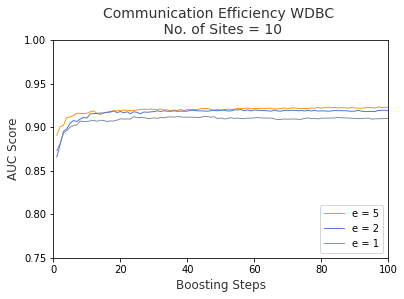

In [144]:
# Communication Efficiency for WDBC
path_comm_effi_BRCA = "/Users/greg/Downloads/AR_Master_Thesis/output/vis_BRCA_comm_effi.csv"
df_BRCA = pd.read_csv(path_comm_effi_BRCA, index_col=False)
df_BRCA = df_BRCA.groupby(['r', 'n', 'e', 'v']).agg(["mean"]).reset_index()
df_BRCA.columns = ['_'.join(col) for col in df_BRCA.columns]

# plt.style.use("tableau-colorblind10")

# Decrase interval thickness as interval widens
# ax_indx = [0, 1, 2]
# n_sites = [2, 5, 10]
n = 10

l_rates = [5, 2, 1]
colors = ['darkorange', 'royalblue', 'lightslategrey']

fig, ax = plt.subplots(1, 1, sharey=True)


for e, c in zip(l_rates, colors): 
    ax.plot(
        df_BRCA[(df_BRCA["n_"]==n) & (df_BRCA["e_"]==e)]["v_"], 
        df_BRCA[(df_BRCA["n_"]==n) & (df_BRCA["e_"]==e)]["auc_mean"], 
        linestyle='solid', 
        linewidth=0.9, 
        color=c, 
        label=f'e = {e}'
    )

ax.legend(loc='lower right')
# ax.set_title(f'n = {n}')

# plt.setp(ax, xlabel='Boosting Steps', alpha=0.8, fontsize=12)
# plt.setp(ax, ylabel='AUC Score', alpha=0.8, fontsize=12)

plt.title(f"Communication Efficiency WDBC \n No. of Sites = {n}", alpha=0.8, fontsize=14)
plt.xlabel("Boosting Steps", alpha=0.8, fontsize=12)
plt.ylabel("AUC Score", alpha=0.8, fontsize=12)

plt.xlim([0, 100])
plt.ylim([0.75, 1])
# plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))

# legend = plt.legend(handles=[one, two, three], title="title", loc=4, fontsize='small', fancybox=True)
# plt.legend(title="No. of weak learners \n trained per site per round")
# Save the figure to file
fig.savefig(path_vis_local + f"vis_comm_effi_BRCA_n_{n}.png")
fig.savefig(path_vis_iCloud + f"vis_comm_effi_BRCA_n_{n}.png")

plt.show()

## Reference

In [88]:
# plt.ioff()
# plt.figure()
# plt.plot(local_metric.number_sites,
#          local_metric["25%"], linewidth=1, alpha=0.7, color="firebrick")
# plt.plot(local_metric.number_sites,
#          local_metric["75%"], linewidth=1, alpha=0.7, color="firebrick")
# plt.plot(local_metric.number_sites,
#          local_metric["mean"], linewidth=1, alpha=1, color="firebrick")
# plt.fill_between(local_metric.number_sites, local_metric["25%"],
#                  local_metric["75%"], alpha=0.3, color="firebrick")
# plt.plot(global_metric.number_sites,
#          global_metric["25%"], linewidth=1, alpha=0.7, color="cornflowerblue")
# plt.plot(global_metric.number_sites,
#          global_metric["75%"], linewidth=1, alpha=0.7, color="cornflowerblue")
# plt.plot(global_metric.number_sites,
#          global_metric["mean"], linewidth=1, alpha=1, color="cornflowerblue")
# plt.fill_between(global_metric.number_sites, global_metric["25%"],
#                  global_metric["75%"], alpha=0.3, color="cornflowerblue")
# sct1 = plt.scatter(global_metric.number_sites,
#                    global_metric["mean"], color="cornflowerblue", marker="o", s=20)
# sct2 = plt.scatter(local_metric.number_sites,
#                    local_metric["mean"], color="firebrick", marker="o", s=20)
# title = dataset_name + " - " + method + " method, " + \
#     str(int(fraction*100)) + " % of features dropped"
# plt.title(title, alpha=0.8, fontsize=14)
# plt.xlabel("Number of Sites", alpha=0.8, fontsize=12)
# plt.ylabel(metric_name, alpha=0.8, fontsize=12)

In [ ]:
print(f"Aggregated Unweighted vs. Aggregated Weighted: {wilcoxon(df_2_2_u['auc_22u'], df_2_2_w['auc_22w'])}")
print(f"Aggregated Unweighted vs. Iterative Unweighted: {wilcoxon(df_2_2_u['auc_22u'], df_2_3_u['auc_23u'])}")
print(f"Aggregated Unweighted vs. Iterative Weighted: {wilcoxon(df_2_2_u['auc_22u'], df_2_3_w['auc_23w'])}")

print(f"Aggregated Weighted vs. Iterative Unweighted: {wilcoxon(df_2_2_w['auc_22w'], df_2_3_u['auc_23u'])}")
print(f"Aggregated Weighted vs. Iterative Weighted: {wilcoxon(df_2_2_w['auc_22w'], df_2_3_w['auc_23w'])}")

print(f"Iterative Unweighted vs. Iterative Weighted: {wilcoxon(df_2_3_u['auc_23u'], df_2_3_w['auc_23w'])}")